In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import yfinance as yf

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score , mean_squared_error

In [2]:
stock_tinker = "NFLX" # Enter stock code from Yahoo Finance Here
data = yf.download(stock_tinker,auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200


In [3]:
data.describe()

,Open,High,Low,Close,Volume
count,5064.000000,5064.000000,5064.000000,5064.000000,5.064000e+03
mean,116.727709,118.507600,114.828783,116.716798,1.650026e+07
std,168.458969,170.857490,165.840063,168.386682,1.921378e+07
min,0.377857,0.410714,0.346429,0.372857,2.856000e+05
25%,3.958214,4.042857,3.892143,3.963929,6.168225e+06
50%,26.039286,26.466428,25.607143,25.996428,1.057595e+07
75%,159.157501,160.904999,157.264999,158.915001,1.973842e+07
max,692.349976,700.989990,686.090027,691.690002,3.234140e+08


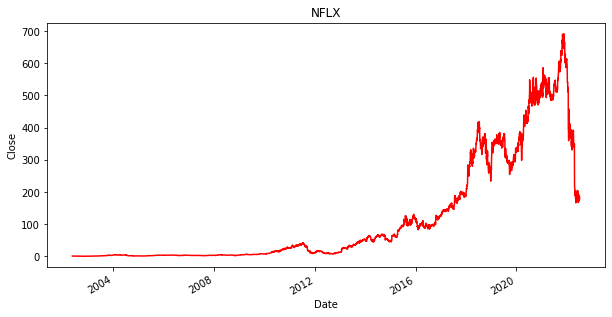

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

data.Close.plot(figsize=(10,5),color="red")
plt.title(stock_tinker)
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

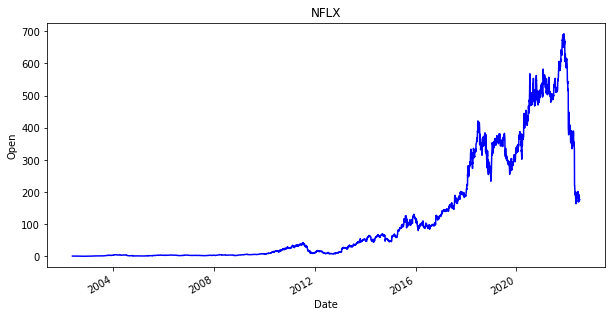

In [5]:
data.Open.plot(figsize=(10,5),color="blue")
plt.xlabel("Date")
plt.ylabel("Open")
plt.title(stock_tinker)
plt.show()

In [6]:
# sns.pairplot(data)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

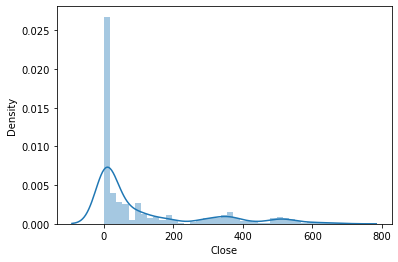

In [7]:
sns.distplot(data["Close"])

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

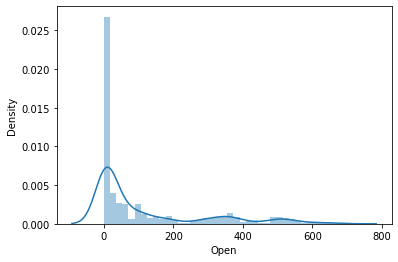

In [8]:
sns.distplot(data["Open"])

In [9]:
x = data.drop('Close',axis=1)
y = data['Close']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=False)

In [11]:
x_test

,Open,High,Low,Volume
Date,,,,
2018-06-26,393.279999,404.779999,389.049988,15191200
2018-06-27,407.559998,411.589996,390.000000,16541400
2018-06-28,395.000000,396.899994,387.100006,12219900
2018-06-29,399.190002,401.329987,390.549988,9252500
2018-07-02,385.450012,398.380005,380.000000,8142500
...,...,...,...,...
2022-06-28,189.199997,192.199997,179.369995,7185400
2022-06-29,179.550003,180.669998,175.100006,5766800
2022-06-30,177.070007,179.449997,170.300003,7894700


In [12]:
def crossValidation(model):
    score = cross_val_score(model,x_test,y_test,cv=10,scoring="neg_mean_squared_error")
    rmse = np.sqrt(-score)
    return rmse

In [13]:
def calculate_Metrics(model):
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test,predict)
    rmse = np.sqrt(mse)
    
    r2Score = r2_score(y_test , predict)
    
    return rmse , r2Score

In [14]:
rmse_dict = {}
r2sc_dict = {}
crossVal_dict = {}

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression().fit(x_train,y_train)

In [17]:
Rmse , R2_score = calculate_Metrics(lr_model)

In [18]:
print("Cross Validation Score : ",np.mean(crossValidation(lr_model)))
print(f"RMSE : {Rmse}\nR2_Score : {R2_score}")

rmse_dict['Linear Regression'] = Rmse
r2sc_dict['Linear Regression'] = R2_score
crossVal_dict['Linear Regression'] = np.mean(crossValidation(lr_model))

Cross Validation Score :  3.767055487368085
RMSE : 4.012480411912832
R2_Score : 0.9988019519068061


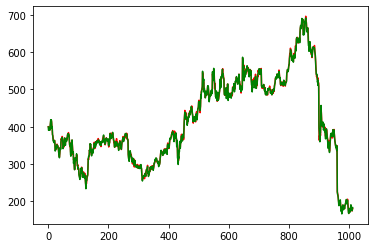

In [19]:
predictedPrice = lr_model.predict(x_test)
plt.plot(predictedPrice,color = 'red')
plt.plot(list(y_test),color='green')
plt.show()

In [20]:
from sklearn.linear_model import Ridge

ri_model = Ridge().fit(x_train,y_train)

In [21]:
Rmse , R2_score = calculate_Metrics(ri_model)
print("Cross Validation Score : ",np.mean(crossValidation(ri_model)))
print(f"RMSE : {Rmse}\nR2_Score : {R2_score}")

rmse_dict['Ridge Regression'] = Rmse
r2sc_dict['Ridge Regression'] = R2_score
crossVal_dict['Ridge Regression'] = np.mean(crossValidation(ri_model))

Cross Validation Score :  3.7670555183794
RMSE : 4.012468805428925
R2_Score : 0.9988019588377337


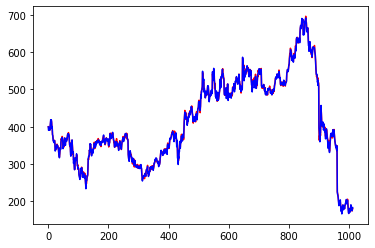

In [22]:
predictedPrice = ri_model.predict(x_test)
plt.plot(predictedPrice,color = 'red',label = 'Predicted Price')
plt.plot(list(y_test),color='blue' , label = 'True Price')
plt.show()

In [23]:
y_test

Date
2018-06-26    399.390015
2018-06-27    390.390015
2018-06-28    395.420013
2018-06-29    391.429993
2018-07-02    398.179993
                 ...    
2022-06-28    179.600006
2022-06-29    178.360001
2022-06-30    174.869995
2022-07-01    179.949997
2022-07-05    183.324997
Name: Close, Length: 1013, dtype: float64

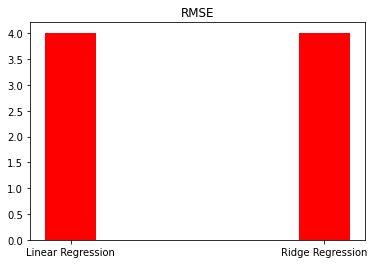

In [24]:
value = list(rmse_dict.values())
keys = list(rmse_dict.keys())

plt.bar(keys , value , color = 'red', width = 0.2 , align = 'center')
plt.title('RMSE')
plt.show()

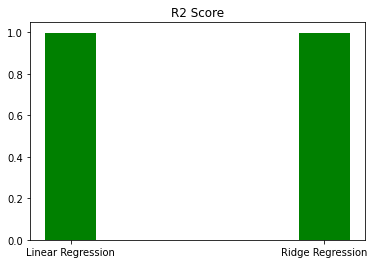

In [25]:
value = list(r2sc_dict.values())
keys = list(r2sc_dict.keys())

plt.bar(keys , value , color = 'green', width = 0.2 , align = 'center')
plt.title('R2 Score')
plt.show()

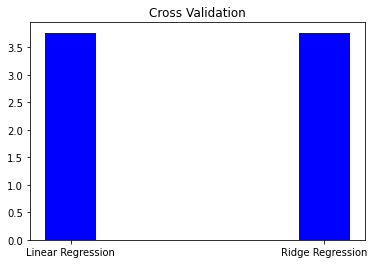

In [26]:
value = list(crossVal_dict.values())
keys = list(crossVal_dict.keys())

plt.bar(keys , value , color = 'blue', width = 0.2 , align = 'center')
plt.title('Cross Validation')
plt.show()